<a href="https://colab.research.google.com/github/DeepakKumarSingh003/Rossmann-Sales-Prediction-/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [39]:
#Import numpy with alias np
import numpy as np
#Import pandas with alias pd
import pandas as pd
#Import seaborn with alias sns
import seaborn as sns
#Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')


In [40]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
File1="/content/drive/MyDrive/Alma better Projects/Supervised ML-Regression/Copy of Rossmann Stores Data.csv"
File2="/content/drive/MyDrive/Alma better Projects/Supervised ML-Regression/Copy of store.csv"

In [42]:
df0=pd.read_csv(File1)
df1=pd.read_csv(File2,index_col="Store")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [60]:
df0.head(1116)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1111,1112,5,2015-07-31,9626,767,1,1,0,1
1112,1113,5,2015-07-31,7289,720,1,1,0,1
1113,1114,5,2015-07-31,27508,3745,1,1,0,1
1114,1115,5,2015-07-31,8680,538,1,1,0,1


In [44]:
df0.shape

(1017209, 9)

In [45]:
df1.head()

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df0.info()
print("\n")
df1.info()

In [79]:

x=[]
for i in df0:
    x.append(i)   

for k in x:
    uni=df0[k].unique()
    print("\n")
    print(uni)
 




[   1    2    3 ... 1113 1114 1115]


[5 4 3 2 1 7 6]


['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05-29' '2015-05-28'
 '2015-05-27' '2015-05-26' '2015-05-25' '2015-05-24' '2015-05-23'
 '2015-05-22' '201

In [81]:
for j in x:
  val=df0[j].value_counts()
  print("\n")
  print(val)
  



1      942
726    942
708    942
709    942
713    942
      ... 
159    758
637    758
636    758
633    758
155    758
Name: Store, Length: 1115, dtype: int64


5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64


2015-07-31    1115
2013-11-06    1115
2013-11-18    1115
2013-11-17    1115
2013-11-16    1115
              ... 
2014-10-28     935
2014-10-27     935
2014-10-26     935
2014-10-25     935
2014-12-08     935
Name: Date, Length: 942, dtype: int64


0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64


0       172869
560       2414
576       2363
603       2337
571       2330
         ...  
4815         1
3998         1
4210         1
4920         1
4065         1
Name: Customers, Length: 4086, dtype: int64


1    844392
0    172817
Name: Open, dtyp

In [102]:
Sales_on_Dayofweek=df0.groupby(['DayOfWeek'])[['Sales']].sum()
Sales_on_Dayofweek

,Sales
DayOfWeek,
1,1130203012
2,1020411930
3,954962863
4,911177709
5,980555941
6,846317735
7,29551433


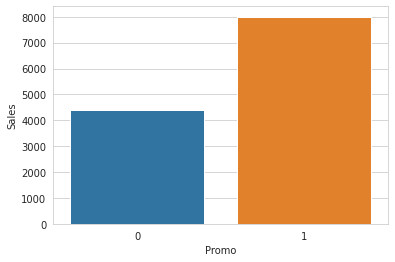

In [82]:
sns.barplot(x = 'Promo',
            y = 'Sales',
            data = df0)
 
# Show the plot
plt.show()

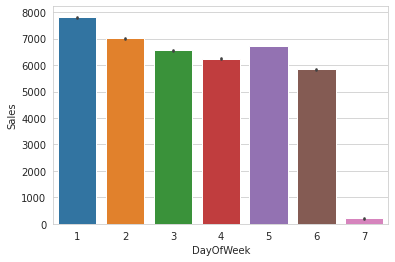

In [84]:
sns.barplot(x = 'DayOfWeek',
            y = 'Sales',
            data = df0)
 
# Show the plot
plt.show()

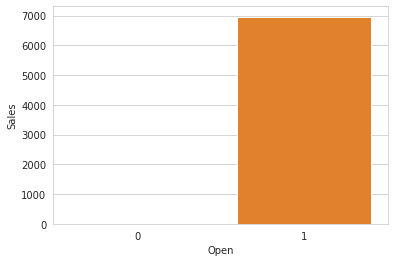

In [83]:
sns.barplot(x = 'Open',
            y = 'Sales',
            data = df0)
 
# Show the plot
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


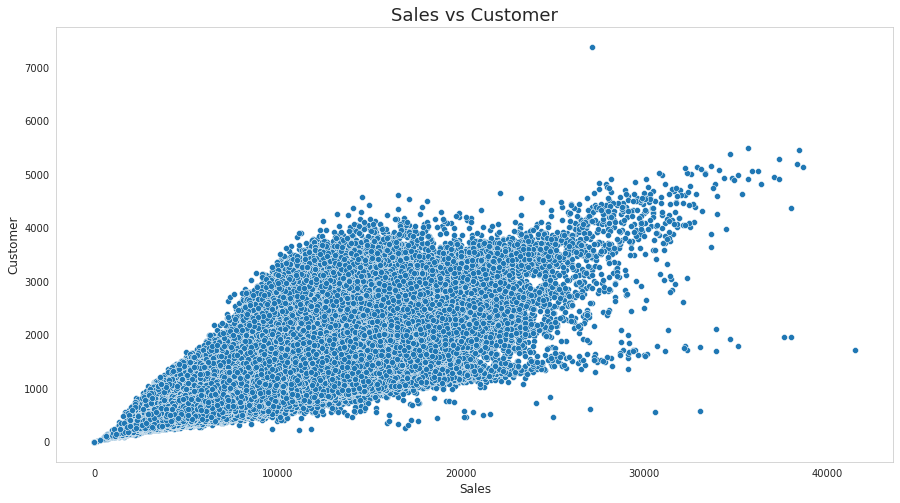

In [98]:
plt.subplots(figsize=(15,8));
sns.scatterplot(df0["Sales"],df0["Customers"],data=df0)
plt.title('Sales vs Customer',fontsize=18)
plt.grid(False)
plt.xlabel("Sales",fontsize=12)
plt.ylabel("Customer",fontsize=12)
plt.show()


In [51]:
df0.Store.unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [52]:
df0.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000


In [86]:
df0["StateHoliday"].astype(str)

0          0
1          0
2          0
3          0
4          0
          ..
1017204    a
1017205    a
1017206    a
1017207    a
1017208    a
Name: StateHoliday, Length: 1017209, dtype: object

In [87]:
df0["StateHoliday"] = df0['StateHoliday'].apply(lambda x: str(x).replace('a',"1") if 'a' in str(x) else x)
df0["StateHoliday"] = df0['StateHoliday'].apply(lambda x: str(x).replace('b',"1") if 'b' in str(x) else x)
df0["StateHoliday"] = df0['StateHoliday'].apply(lambda x: str(x).replace('c',"1") if 'c' in str(x) else x)
# df0["StateHoliday"] = df0['StateHoliday'].apply(lambda x: str(x).replace('',"1") if 'c' in str(x) else x)
#change k(KB) into MB convert string with k to float & divide by 1024
#convert kB into MB (1024Kb=1Mb) 
# df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)


In [88]:
df0["StateHoliday"].value_counts()

0    855087
0    131072
1     31050
Name: StateHoliday, dtype: int64

In [89]:
df0["StateHoliday"] = df0["StateHoliday"].apply(pd.to_numeric, errors='coerce')

In [97]:
df0["StateHoliday"].unique()

array([0, 1])

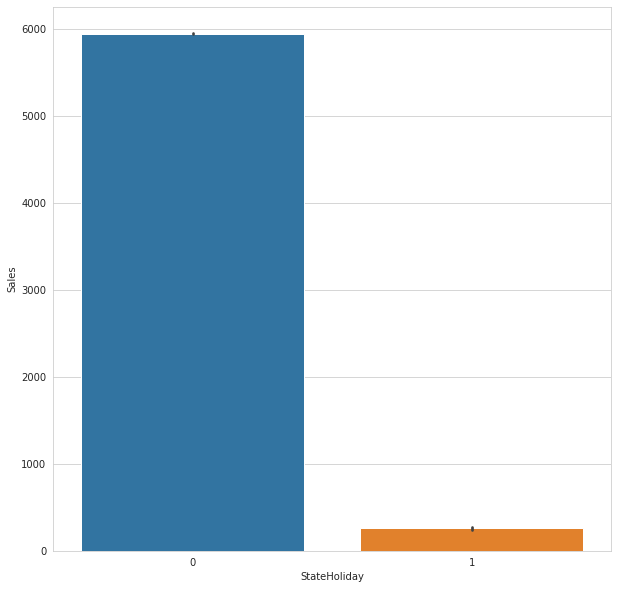

In [100]:
sns.barplot(x = 'StateHoliday',
            y = 'Sales',
            data = df0)
 
# Show the plot
plt.show()

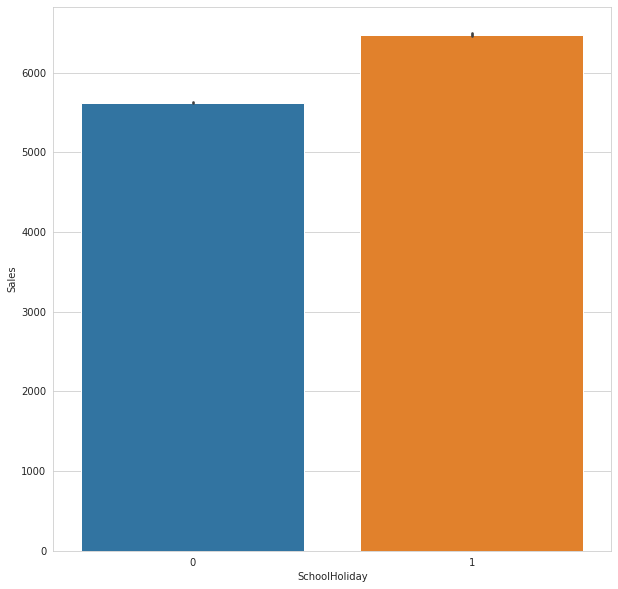

In [101]:
sns.barplot(x = 'SchoolHoliday',
            y = 'Sales',
            data = df0)
 
# Show the plot
plt.show()